# **Import Dependencies**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Import Dataset Using Pandas
df = pd.read_excel('/content/Data_Train.xlsx',parse_dates=['Date_of_Journey'])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#**Basic Information of Our Dataset**

In [8]:
# Check the Number of Rows and Columns of data
df.shape

(10683, 11)

In [9]:
# Check the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [10]:
# Check the statistics info of the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#**Data Cleaning**

In [11]:
# Checking for Null Values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
# Drop Null values Because there is a only 2 Null Values
df.dropna(inplace=True)

In [13]:
# Checking for Null Values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
# Checking for Duplicated Values
df.duplicated().sum()

220

In [15]:
# Drop Duplicated Values
df.drop_duplicates(keep='first',inplace=True)

In [16]:
# After Removed Duplicated
df.duplicated().sum()

0

In [17]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


#**Feature Engineering**

In [18]:
# Derive Two New Columns from Date of Journey (Day, Month)
df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month

In [19]:
# pd.to_datetime(df['Arrival_Time']).dt.time

In [20]:
# Derive New Column of Weekend days
df['date_is_weekend'] = np.where(df['Date_of_Journey'].dt.day_name().isin(['Saturday','Sunday']),1,0)

In [21]:
# Derive Two New Columns from Dep_time (Dep_hour,Dep_min)

# Method 1:
# pd.to_datetime(df['Dep_Time']).dt.hour

# Method 2:
df['Dep_Hour'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[0]))
df['Dep_Min'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[1]))

In [22]:
# Derive Two New Columns from Arrival_time (Arrival_hour,Arrival_min)

# Method 1:
# pd.to_datetime(df['Arrival_Time']).dt.hour

# Method 2:
df['Arrival_Hour'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[0]))
df['Arrival_Min'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[1].split()[0]))

In [23]:
# PreProcessing of Duration Columns and Derive New Two Columns (Duration_Hours,Duration_Min)
df['Duration'].unique()

# Function for impute duration values like 0h or 0m
def impute_Duration(duration):
    x = duration.split()
    
    if len(x) != 2:
        if 'h' in x[0]:
            return x[0] + ' 0m'
        else:
            return '0h ' + x[0]
        
    else:
        return duration

# Call Function
df['Duration'] = df['Duration'].apply(impute_Duration)

In [24]:
# Make New Two Columns of Duration
df['Duration_Hour'] = df['Duration'].apply(lambda x:int(x.split('h')[0]))
df['Duration_Minute'] = df['Duration'].apply(lambda x:x.split('m')[0].split()[1])

In [119]:
# Now Let's Handle Total Stops Column
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [26]:
# Converting String to Integer

# Method 1:
# df = df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

#Method 2:
from sklearn.preprocessing import OrdinalEncoder

# Convert String to Integer Using Ordinal Encoder Because that is a ordering column
oec = OrdinalEncoder(categories=[['non-stop', '1 stop', '2 stops', '3 stops', '4 stops']],dtype=int)

stops = oec.fit_transform(np.array(df['Total_Stops']).reshape(-1,1))

df['Total_Stops'] = stops

In [27]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,date_is_weekend,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,1,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h 0m,2,No info,13882,6,9,0,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,0,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,0,16,50,21,35,4,45


we can see from the data that Route and Total Stops are Presenting Same Info for stops. So, we are going to drop Route Column.

In [28]:
# Drop Route,Date_of_journey,Dep_Time,Arrival_Time,Durations,Additional Info(Not Important) Columns
df = df.drop(['Route','Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis='columns')

In [29]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,date_is_weekend,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,0,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,0,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,0,16,50,21,35,4,45


#**Exploratory Data Analysis**


In [30]:
# Let's Analyze Airline Column
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

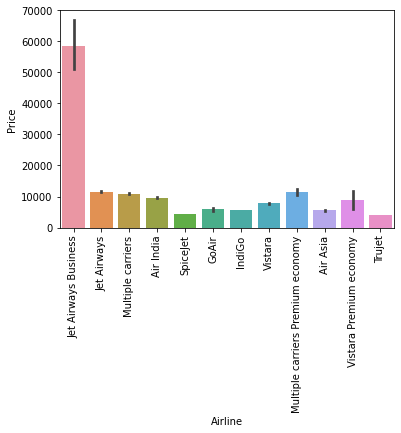

In [31]:
# Average Prices of Every Airlines
sns.barplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.show()

We can see from the chart that jet Airways Business Flight Price is Very Higher in compare to Other Airlines

In [32]:
# Let's Analyze Source and Destination Also
df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

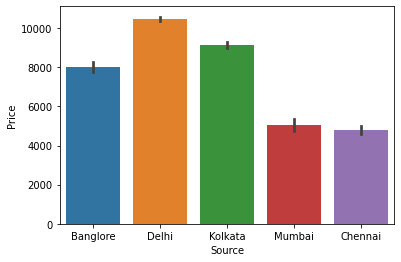

In [33]:
# Average Price from Avery Source
sns.barplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

We can see from the above chart that average price of Banglore, Delhi and Kolkata is Higher.

In [34]:
# Let's Analyze Destination Column also
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

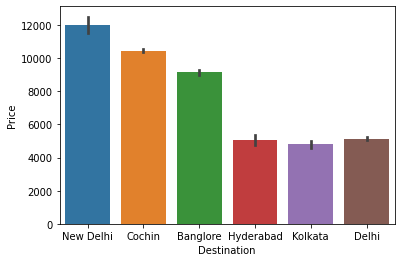

In [35]:
# We can make Visualization With Avg. Price for Destination
sns.barplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

New Delhi, Cochin and Banglore's Price is Very High in Compare to Others

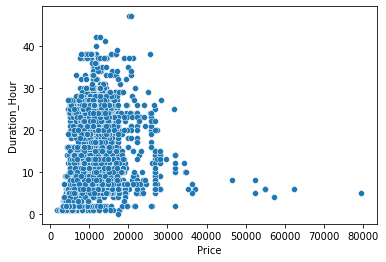

In [36]:
# Let's Analyze If Our Duration Hour is Increasing than Our Price are increasing Or Not ? 
sns.scatterplot(data=df,x='Price',y='Duration_Hour')

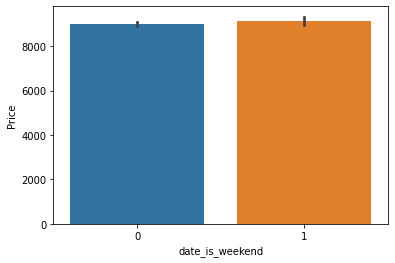

In [37]:
# Let's Check that Price is effected by Weekend or not ?
sns.barplot(data=df,x='date_is_weekend',y='Price')

No. There is almost Same Average Price on Weekend Days and Other Days.

## Outliers Detection

In [38]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,date_is_weekend,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,0,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,0,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,0,16,50,21,35,4,45


In [39]:
print(df.shape)

(10462, 14)


In [40]:
# for check Outliers
# df[(df['Airline'] == 'Air Asia') & (df['Source'] == 'Banglore') & (df['Price']>5265) & (df['Destination'] == 'Delhi')]

# Function for remove ourliers
def remove_airline_price_outliers(df):
    df_out = pd.DataFrame()
    for airline,airline_df in df.groupby('Airline'):
        for source,source_df in airline_df.groupby('Source'):
            for destination,destination_df in source_df.groupby('Destination'):
                
                m = np.mean(destination_df['Price'])
                st = np.std(destination_df['Price'])
                
                reduced_df = destination_df[(destination_df['Price'] >=(m-st)) & (destination_df['Price'] <= (m+st))]
                
                df_out = pd.concat([df_out,reduced_df],ignore_index=True)
        
    return df_out
        
df2 = remove_airline_price_outliers(df)

In [41]:
# Shape After Remove Outliers
df.shape,df2.shape

((10462, 14), (7884, 14))

In [42]:
# Convert Airlines,Source and Destinations to Numerical Using Encoding
dummies = pd.get_dummies(df2[['Airline','Source','Destination']],drop_first=True)

In [43]:
# fetch columns name for our final Dataset
cols = list(df2.columns) + list(dummies.columns)
cols

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Price',
 'journey_day',
 'journey_month',
 'date_is_weekend',
 'Dep_Hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min',
 'Duration_Hour',
 'Duration_Minute',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi']

In [44]:
# Now Concat Dummies of Categorical Variable to Real DataFrame
df3 = pd.concat([df2,dummies],ignore_index=True,axis=1)
df3.columns = cols

In [45]:
final_df = df3.drop(['Airline','Source','Destination'],axis=1)

In [46]:
final_df.sample(5)

,Total_Stops,Price,journey_day,journey_month,date_is_weekend,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6743,1,11789,6,9,0,10,20,19,0,8,40,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5233,1,10844,18,5,1,8,25,22,35,14,10,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7109,0,3841,15,6,1,14,55,17,25,2,30,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7734,1,8610,6,12,0,20,20,18,50,22,30,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3392,0,7229,21,5,0,17,45,20,45,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [47]:
# Shape of Our Final Dataset
final_df.shape

(7884, 31)

In [48]:
final_df.corr()['Price'].sort_values(ascending=False)

Price                                        1.000000
Total_Stops                                  0.687085
Duration_Hour                                0.627066
Airline_Jet Airways                          0.531268
Destination_Cochin                           0.352125
Source_Delhi                                 0.352125
Airline_Jet Airways Business                 0.268282
Destination_New Delhi                        0.202865
Airline_Multiple carriers                    0.175970
Airline_Air India                            0.096099
journey_month                                0.073696
Arrival_Hour                                 0.054170
Airline_Multiple carriers Premium economy    0.020228
Dep_Hour                                     0.014681
Source_Kolkata                               0.009341
Airline_Vistara Premium economy              0.002935
date_is_weekend                             -0.009684
Airline_Trujet                              -0.012297
Airline_Vistara             

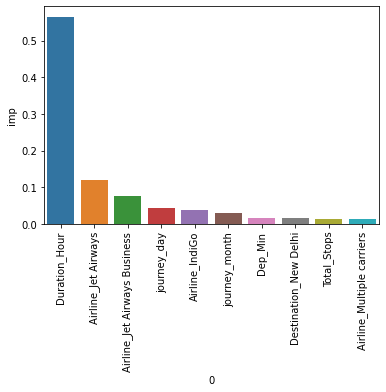

In [49]:
from sklearn.tree import ExtraTreeRegressor

etr = ExtraTreeRegressor(splitter='best')

fp = etr.fit(final_df.drop('Price',axis=1),final_df['Price'])

col = pd.DataFrame(final_df.drop('Price',axis=1).columns)
col['imp'] = fp.feature_importances_
col.sort_values('imp',ascending=False)[:10]

sns.barplot(x=col.sort_values('imp',ascending=False)[:10][0],y=col.sort_values('imp',ascending=False)[:10]['imp'],data=col)
plt.xticks(rotation='vertical')
plt.show()

# Building Model

In [50]:
# import all the model and other required libraries
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [51]:
# Extracting Our Independent and Dependent Variables
X = final_df.drop('Price',axis=1)
y = final_df['Price']

In [52]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
X_train.shape

(6307, 30)

In [71]:
# Searching Best Model Using GridSeacrhCV

def find_best_model(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':range(100,400,100),
                'max_depth':[10,20,30,40,50],
                # 'min_samples_split':range(2,10,2),
                # 'min_samples_leaf':range(1,10,2)
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'splitter':['best','random'],
                'max_depth':[10,20,30],
                'min_samples_split':range(2,20,2),
                'min_samples_leaf':range(1,10,2)
             }
        },
        'Knearest_neighbour':{
            'model':KNeighborsRegressor(),
            'params':{
                'n_neighbors':[1,3,5,7]
             }
        },
        'SVR':{
            'model':SVR(),
            'params':{
                'C':[0.1,0.5,1,1.5,2]
             }
        },
        
        

    }
    
    scores = []
    
    cv = ShuffleSplit(n_splits=5,random_state=0,test_size=0.2)
    
    for model_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model Name':model_name,
            'Best Score':gs.best_score_,
            'Best Params':gs.best_params_
        })
        
    return pd.DataFrame(scores)

In [72]:
# Find best scores for all Models
find_best_model(X,y)

,Model Name,Best Score,Best Params
0,linear_regression,0.812154,{}
1,random_forest,0.856527,"{'max_depth': 10, 'n_estimators': 200}"
2,decision_tree,0.884612,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_..."
3,Knearest_neighbour,0.702524,{'n_neighbors': 3}
4,SVR,0.059914,{'C': 2}


We can Clearly see Decision Tree is giving us Best Performance. So, we will use DecisionTree for Our Prediction. 

In [93]:
# Build Model
model = DecisionTreeRegressor(max_depth=30,min_samples_leaf=1,min_samples_split=18,splitter='random') 

# Model Training
model.fit(X_train,y_train)

print(model.score(X_test,y_test))
print(model.score(X_test,y_test))

0.884436469818202
0.884436469818202


In [95]:
# Prediction on Train Data
y_train_pred = model.predict(X_train)

# Prediction on Test Data
y_test_pred = model.predict(X_test)

# **Model Evaluation**

In [106]:
# import Libraries
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# function for model evaluation
def model_evaluation(y_actual,y_pred):
  r2 = r2_score(y_actual,y_pred)
  mae = mean_absolute_error(y_actual,y_pred)
  mse = mean_squared_error(y_actual,y_pred)
  rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
  return pd.Series({'r2_score':r2,'mse':mse,'mae':mae,'rmse':rmse})

In [109]:
# Scores on Train Data
train_score = model_evaluation(y_train,y_train_pred)

# Scores on Test Data
test_score = model_evaluation(y_test,y_test_pred)

r2_score    9.272368e-01
mse         1.119324e+06
mae         6.712414e+02
rmse        1.057981e+03
dtype: float64

In [113]:
# Making Scorecard of Train and Test Data
scorecard = pd.concat([train_score,test_score],axis=1)
scorecard.columns = ['Train Data','Test Data']
scorecard

,Train Data,Test Data
r2_score,9.272368e-01,8.844365e-01
mse,1.119324e+06,1.595692e+06
mae,6.712414e+02,8.137414e+02
rmse,1.057981e+03,1.263207e+03


Let's do Cross Score Validation on Our Entire DataSet

In [118]:
# Crossvalidation of Entire Dataset

# Making 10 Folds of Our Data and Taking Test Size of 20%
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

# Applying Cross Validation
cross_val_score(model,X,y,scoring='r2',cv=cv).mean()

0.8922153626955662